EXAMPLE 1: AND GATE USING PERCEPTRON
Training Perceptron...
Epoch 1/10 - Total Error: 2
Epoch 2/10 - Total Error: 2
Epoch 3/10 - Total Error: 2
Epoch 4/10 - Total Error: 2
Epoch 5/10 - Total Error: 3
Epoch 6/10 - Total Error: 2
Epoch 7/10 - Total Error: 2
Epoch 8/10 - Total Error: 1
Epoch 9/10 - Total Error: 2
Epoch 10/10 - Total Error: 2
Training Complete!

Testing AND Gate:
X1 | X2 | Predicted | Actual
-----------------------------------
 0 |  0 |     0     |   0
 0 |  1 |     1     |   0
 1 |  0 |     0     |   0
 1 |  1 |     1     |   1

Accuracy: 75.0%

EXAMPLE 2: OR GATE USING PERCEPTRON
Training Perceptron...
Epoch 1/10 - Total Error: 2
Epoch 2/10 - Total Error: 2
Epoch 3/10 - Total Error: 3
Epoch 4/10 - Total Error: 2
Epoch 5/10 - Total Error: 2
Epoch 6/10 - Total Error: 2
Epoch 7/10 - Total Error: 2
Epoch 8/10 - Total Error: 2
Epoch 9/10 - Total Error: 2
Epoch 10/10 - Total Error: 2
Training Complete!

Testing OR Gate:
X1 | X2 | Predicted | Actual
----------------------------

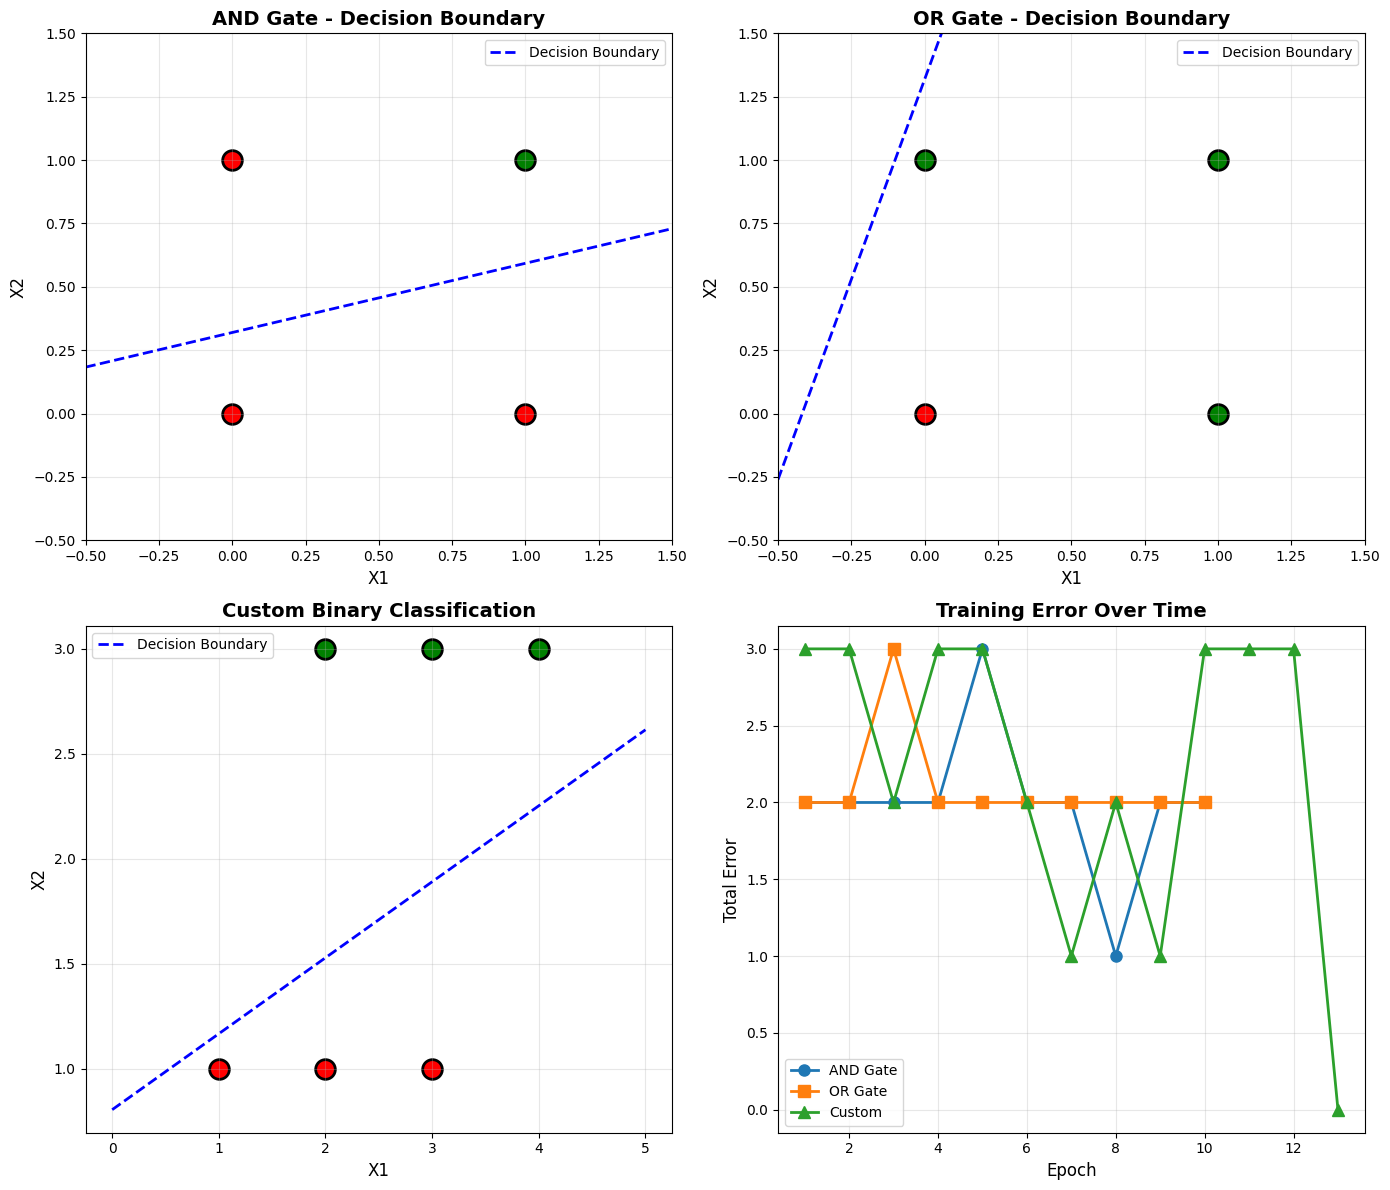


Visualization complete!

Note: Green = Class 1, Red = Class 0
Blue dashed line = Decision Boundary


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """Simple Perceptron Implementation"""
    def __init__(self, num_inputs, learning_rate=0.1):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.errors = []

    def activation(self, x):
        """Step activation function"""
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        """Predict output for given inputs"""
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, X, y, epochs=10):
        """Train the perceptron"""
        print("Training Perceptron...")
        print("="*50)

        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

                total_error += abs(error)

            self.errors.append(total_error)
            print(f"Epoch {epoch+1}/{epochs} - Total Error: {total_error}")

            # Stop if no errors
            if total_error == 0:
                print(f"\nConverged at epoch {epoch+1}!")
                break

        print("="*50)
        print("Training Complete!\n")

    def evaluate(self, X, y):
        """Evaluate accuracy on test data"""
        correct = 0
        for i in range(len(X)):
            if self.predict(X[i]) == y[i]:
                correct += 1
        accuracy = (correct / len(X)) * 100
        return accuracy


# Example 1: AND Gate
print("="*50)
print("EXAMPLE 1: AND GATE USING PERCEPTRON")
print("="*50)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

perceptron_and = Perceptron(num_inputs=2, learning_rate=0.1)
perceptron_and.train(X_and, y_and, epochs=10)

print("Testing AND Gate:")
print("X1 | X2 | Predicted | Actual")
print("-" * 35)
for i in range(len(X_and)):
    pred = perceptron_and.predict(X_and[i])
    print(f" {X_and[i][0]} |  {X_and[i][1]} |     {pred}     |   {y_and[i]}")

accuracy_and = perceptron_and.evaluate(X_and, y_and)
print(f"\nAccuracy: {accuracy_and}%")


# Example 2: OR Gate
print("\n" + "="*50)
print("EXAMPLE 2: OR GATE USING PERCEPTRON")
print("="*50)

X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

perceptron_or = Perceptron(num_inputs=2, learning_rate=0.1)
perceptron_or.train(X_or, y_or, epochs=10)

print("Testing OR Gate:")
print("X1 | X2 | Predicted | Actual")
print("-" * 35)
for i in range(len(X_or)):
    pred = perceptron_or.predict(X_or[i])
    print(f" {X_or[i][0]} |  {X_or[i][1]} |     {pred}     |   {y_or[i]}")

accuracy_or = perceptron_or.evaluate(X_or, y_or)
print(f"\nAccuracy: {accuracy_or}%")


# Example 3: Custom Binary Classification
print("\n" + "="*50)
print("EXAMPLE 3: CUSTOM BINARY CLASSIFICATION")
print("="*50)

# Generate some linearly separable data
np.random.seed(42)
X_custom = np.array([
    [2, 3], [3, 3], [4, 3],
    [1, 1], [2, 1], [3, 1]
])
y_custom = np.array([1, 1, 1, 0, 0, 0])

perceptron_custom = Perceptron(num_inputs=2, learning_rate=0.1)
perceptron_custom.train(X_custom, y_custom, epochs=20)

print("Testing Custom Classification:")
print("X1 | X2 | Predicted | Actual")
print("-" * 35)
for i in range(len(X_custom)):
    pred = perceptron_custom.predict(X_custom[i])
    print(f" {X_custom[i][0]} |  {X_custom[i][1]} |     {pred}     |   {y_custom[i]}")

accuracy_custom = perceptron_custom.evaluate(X_custom, y_custom)
print(f"\nAccuracy: {accuracy_custom}%")


# Visualization
print("\n" + "="*50)
print("VISUALIZATIONS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: AND Gate Decision Boundary
ax1 = axes[0, 0]
for i in range(len(X_and)):
    color = 'green' if y_and[i] == 1 else 'red'
    ax1.scatter(X_and[i][0], X_and[i][1], c=color, s=200, edgecolors='black', linewidth=2)

# Draw decision boundary
x_line = np.linspace(-0.5, 1.5, 100)
if perceptron_and.weights[1] != 0:
    y_line = -(perceptron_and.weights[0] * x_line + perceptron_and.bias) / perceptron_and.weights[1]
    ax1.plot(x_line, y_line, 'b--', linewidth=2, label='Decision Boundary')

ax1.set_xlabel('X1', fontsize=12)
ax1.set_ylabel('X2', fontsize=12)
ax1.set_title('AND Gate - Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)

# Plot 2: OR Gate Decision Boundary
ax2 = axes[0, 1]
for i in range(len(X_or)):
    color = 'green' if y_or[i] == 1 else 'red'
    ax2.scatter(X_or[i][0], X_or[i][1], c=color, s=200, edgecolors='black', linewidth=2)

x_line = np.linspace(-0.5, 1.5, 100)
if perceptron_or.weights[1] != 0:
    y_line = -(perceptron_or.weights[0] * x_line + perceptron_or.bias) / perceptron_or.weights[1]
    ax2.plot(x_line, y_line, 'b--', linewidth=2, label='Decision Boundary')

ax2.set_xlabel('X1', fontsize=12)
ax2.set_ylabel('X2', fontsize=12)
ax2.set_title('OR Gate - Decision Boundary', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)

# Plot 3: Custom Classification
ax3 = axes[1, 0]
for i in range(len(X_custom)):
    color = 'green' if y_custom[i] == 1 else 'red'
    ax3.scatter(X_custom[i][0], X_custom[i][1], c=color, s=200, edgecolors='black', linewidth=2)

x_line = np.linspace(0, 5, 100)
if perceptron_custom.weights[1] != 0:
    y_line = -(perceptron_custom.weights[0] * x_line + perceptron_custom.bias) / perceptron_custom.weights[1]
    ax3.plot(x_line, y_line, 'b--', linewidth=2, label='Decision Boundary')

ax3.set_xlabel('X1', fontsize=12)
ax3.set_ylabel('X2', fontsize=12)
ax3.set_title('Custom Binary Classification', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Training Error over Epochs
ax4 = axes[1, 1]
ax4.plot(range(1, len(perceptron_and.errors)+1), perceptron_and.errors, 'o-',
         linewidth=2, markersize=8, label='AND Gate')
ax4.plot(range(1, len(perceptron_or.errors)+1), perceptron_or.errors, 's-',
         linewidth=2, markersize=8, label='OR Gate')
ax4.plot(range(1, len(perceptron_custom.errors)+1), perceptron_custom.errors, '^-',
         linewidth=2, markersize=8, label='Custom')
ax4.set_xlabel('Epoch', fontsize=12)
ax4.set_ylabel('Total Error', fontsize=12)
ax4.set_title('Training Error Over Time', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete!")
print("\nNote: Green = Class 1, Red = Class 0")
print("Blue dashed line = Decision Boundary")

Epoch [1/10], weight:[[-0.10120995 -0.16843723]], bias:[0.03985254] Loss: 68.0000
Epoch [2/10], weight:[[-0.03159336 -0.18625084]], bias:[0.01385255] Loss: 26.0000
Epoch [3/10], weight:[[-0.01734713 -0.1863709 ]], bias:[0.00785255] Loss: 6.0000
Epoch [4/10], weight:[[-0.00821825 -0.1855983 ]], bias:[0.00685255] Loss: 1.0000
Epoch [5/10], weight:[[-0.00156316 -0.18465999]], bias:[0.00685255] Loss: 0.0000
Epoch [6/10], weight:[[ 0.00358866 -0.18373527]], bias:[0.00585255] Loss: 1.0000
Epoch [7/10], weight:[[ 0.0066186  -0.18286248]], bias:[0.00385255] Loss: 2.0000
Epoch [8/10], weight:[[ 0.00964853 -0.18198968]], bias:[0.00185255] Loss: 2.0000
Epoch [9/10], weight:[[ 0.01258794 -0.18111849]], bias:[0.00085255] Loss: 1.0000
Epoch [10/10], weight:[[ 0.01552735 -0.18024729]], bias:[-0.00014745] Loss: 1.0000
Accuracy on Test Dataset: 0.9850000143051147


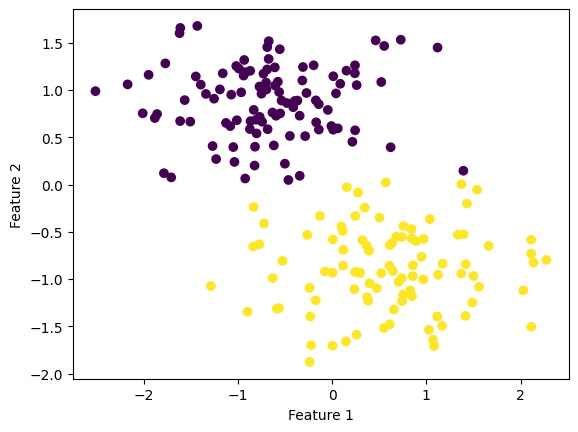

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, num_inputs):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(num_inputs, 1)

    # Heaviside Step function
    def heaviside_step_fn(self,Z):
        Class = []
        for z in Z:
            if z >=0:
                Class.append(1)
            else:
                Class.append(0)
        return torch.tensor(Class)

    def forward(self, x):
        Z = self.linear(x)
        return self.heaviside_step_fn(Z)


# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
    cost = y_pred-Y
    return cost


# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
    Losses = 0
    for Input, Class in zip(X_train, y_train):
        # Forward pass
        predicted_class = perceptron(Input)
        error = loss(predicted_class, Class)
        Losses += error
        # Perceptron Learning Rule

        # Model Parameter
        w = perceptron.linear.weight
        b = perceptron.linear.bias

        # Matually Update the model parameter
        w = w - learning_rate * error * Input
        b = b - learning_rate * error

        # assign the weight &amp; bias parameter to the linear layer
        perceptron.linear.weight = nn.Parameter(w)
        perceptron.linear.bias   = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        epoch+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))

# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()